In [1]:
from pulse_animation import *

%config InlineBackend.figure_format = 'retina'

# Frequency chirped pulse

By making the refractive index frequency dependent, the shape of the pulse changes over time as it propagates through an optical fiber. The leading edge of the pulse gets red shifted, i.e. the instantaneous frequency becomes smaller while the trailing edge is blue shifted, i.e. the instantaneous frequency becomes larger.

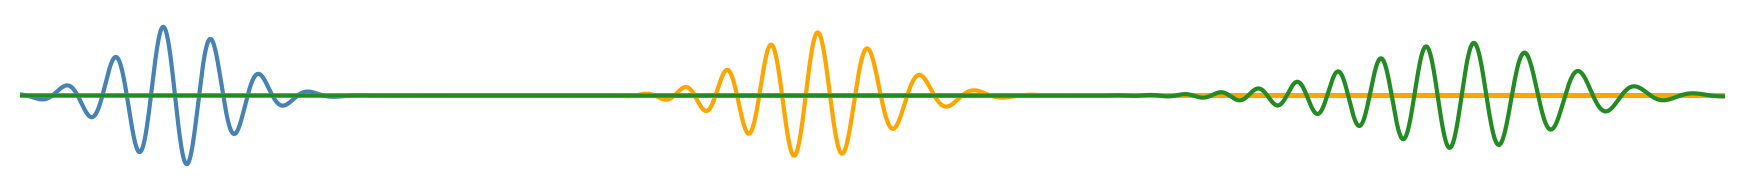

In [2]:
z = np.linspace(-20, 200, 10000)
# +z_max=100 - nice settings to get three good pulses with stretching
plot_pulses(
    z,
    np.linspace(0, 500, 3),
    nu_center=0.15,
    k_i=[1, 3, 2, 5],
    no_axes=True,
    plotname="./plots/chirped_pulses/pulses",
    figuresize=(11, 1),
    colors=["steelblue", "orange", "forestgreen"],
    spec_width=100,
)

# Spectral components of a pulse

The pulse can be decomposed to its spectral components, i.e. plane waves of different wavelengths. The pulse itself is the sum of all the spectral components. The plots below show the resulting pulse, the corresponding spectral components (due to reasons of visibility, only a few of them with large amplitude are shown) as well as the underlying frequency spectrum.

plotted 240 frequencies


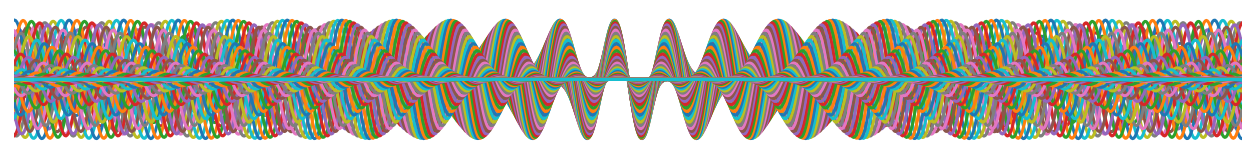

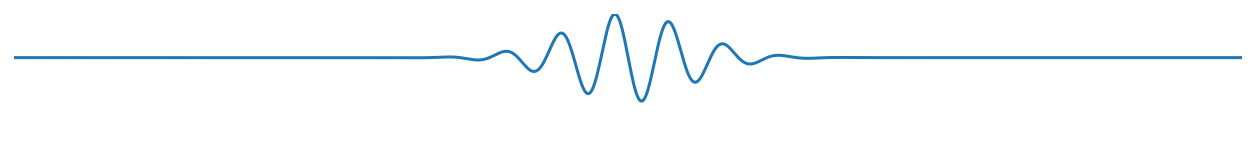

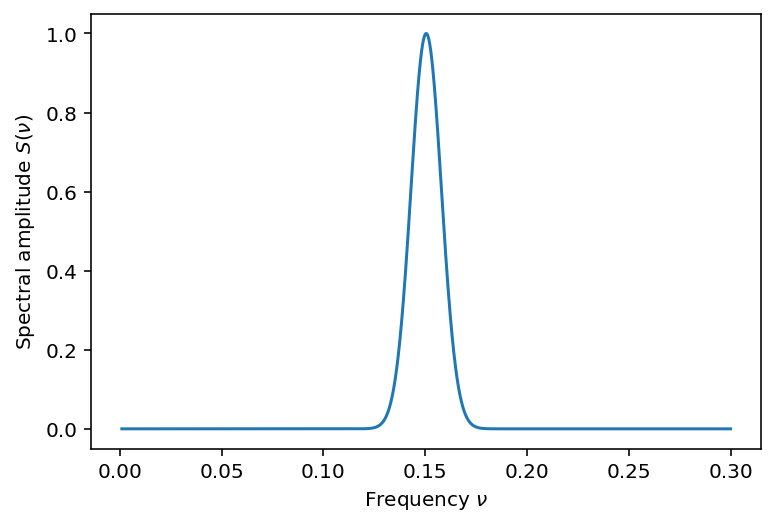

In [3]:
z = np.linspace(-70, 70, 1000)
d = sin_sum(
    z,
    0,
    N_frequencies=4000,
    nu_center=0.15,
    k_i=(1, 3, 2),
    spec_width=100,
    plotting=True,
    figuresize=(11, 1.2),
    savein="./plots/sum_demonstration",
)

# Different orders of dispersion

## First order dispersion

If the pulse only experiences first order dispersion as shown in the animation below, the shape of the pulse does not change with time.

In [4]:
z = np.linspace(0, 100, 1000)
p = calc_pulses(
    z,
    t_start=0,
    t_end=1000,
    n_steps=200,
    nu_center=0.025,
    k_i=[4, 10, 0],
    spec_width=600,
)
animate(
    z,
    p,
    ms_between_frames=40,
    figuresize=(14, 4),
)  # saveas="./animations/1st_order_dispersion.mp4")

100%|██████████| 200/200 [00:52<00:00,  3.83it/s]


## Second order dispersion (Group velocity dispersion)

By introducing $\frac{d^2k}{d\omega^2} \neq 0$, the pulse disperses. This results in a pulse with a linear frequency chirp.

In [6]:
z = np.linspace(-30, 600, 1000)
p = calc_pulses(
    z, t_start=0, t_end=2500, n_steps=500, nu_center=0.02, k_i=[1, 3, 2], spec_width=600
)
animate(
    z,
    p,
    ms_between_frames=40,
    figuresize=(14, 4),
)  # saveas="./animations/group_velocity_dispersion.mp4")

100%|██████████| 500/500 [02:13<00:00,  3.74it/s]


## Third order dispersion

By introducing $\frac{d^3k}{d\omega^3} \neq 0$, the pulse also disperses. This results in a quadratic frequency of the pulse.

In [7]:
z = np.linspace(-30, 600, 1000)
p = calc_pulses(
    z,
    t_start=0,
    t_end=2500,
    n_steps=200,
    nu_center=0.02,
    k_i=[1, 3, 2, 6],
    spec_width=600,
)
animate(
    z,
    p,
    ms_between_frames=40,
    figuresize=(14, 4),
    saveas="./animations/3rd_order_dispersion.mp4",
)

100%|██████████| 200/200 [00:53<00:00,  3.75it/s]


Saving as .mp4


## Special case: Group velocity = phase velocity

This is the case if $n(\omega) = n$, which means that the refractive index does not depend on the (vacuum) wavelength. In term of the wave vector $k(\omega)$, this means

\begin{align}
    k(\omega) = \frac{2 \pi n(\omega)}{\lambda_0} = \frac{2 \pi n}{c_0 / \nu} = \frac{\omega n}{c_0} \propto \omega
\end{align}

In case of the implementation in the code here, where $k(\omega)$ is written as a taylor expansion around $\omega_0$, this means

\begin{align}
    k(\omega) = a \omega \overset{!}{=} k_0 + k_1 \cdot (\omega - \omega_0)
\end{align}

\begin{align}
    \rightarrow k_0 = k_1 ~ \omega_0 ~~~ \text{and} ~~~ a=k_1
\end{align}

In [8]:
z = np.linspace(0, 200, 1000)
p = calc_pulses(
    z,
    t_start=0,
    t_end=2000,
    n_steps=200,
    nu_center=0.02,
    k_i=[10 * 2 * np.pi * 0.02, 10, 0],
    spec_width=600,
)
animate(
    z,
    p,
    ms_between_frames=40,
    figuresize=(14, 4),
    saveas="./animations/group_equal_phase.mp4",
)

100%|██████████| 200/200 [00:52<00:00,  3.81it/s]


Saving as .mp4


# Visualisation of an optical fibre

In order to obtain a visualisation of the input pulse at the start of an optical fibre, the propagation in the fibre and the output pulse at the end of the fibre, the animation below can be used.

In [9]:
import matplotlib
from pulse_animation import *

%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams.update({"font.size": 13})

In [10]:
z = np.linspace(0, 350, 500)
p = calc_pulses(
    z,
    t_start=-1000,
    t_end=5000,
    n_steps=100,
    nu_center=0.02,
    k_i=[10 * 2 * np.pi * 0.02, 10, 20, 0],
    spec_width=500,
)

100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


In [11]:
animate_with_time(
    z,
    p,
    fixed_z_1=0,
    fixed_z_2=499,
    figuresize=(14, 10),
    ms_between_frames=40,
    saveas="./animations/optical_fibre.mp4",
    z_offset=30,
)

>>> Finished animating
Saving as .mp4
